In [3]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

import matplotlib.pyplot as plt  # plots
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations
#import seaborn as sns  # more plots
#sns.set()

import warnings  
from itertools import product  # some useful functions

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt
from dateutil.relativedelta import \
    relativedelta  # working with dates with style
from scipy.optimize import minimize  # for function minimization
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore") # `do not disturbe` mode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv("data/solarn_month.csv", delimiter=";")

In [4]:
df.head(10)

,Year,month,year_float,sunspots,std,observations,def_or_prov
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
5,1749,6,1749.455,139.2,-1.0,-1,1
6,1749,7,1749.538,158.0,-1.0,-1,1
7,1749,8,1749.623,110.5,-1.0,-1,1
8,1749,9,1749.707,126.5,-1.0,-1,1
9,1749,10,1749.790,125.8,-1.0,-1,1


In [5]:
data = df["sunspots"].values

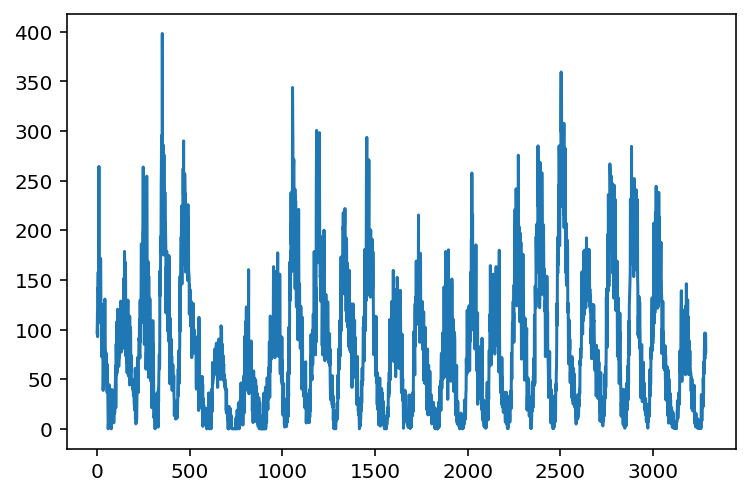

In [6]:
plt.plot(data)
plt.show()

In [10]:
import matplotlib.pyplot as plt  # plots
import numpy as np  # vectors and matrices
import pandas as pd  # tables and data manipulations
import seaborn as sns  # more plots

sns.set()

import warnings  
from itertools import product  # some useful functions

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # statistics and econometrics
import statsmodels.tsa.api as smt
from dateutil.relativedelta import \
    relativedelta  # working with dates with style
from scipy.optimize import minimize  # for function minimization
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore") # `do not disturbe` mode

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [82]:
from numpy import fft

def fourierExtrapolation(x, n_predict, n_harm = 120):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


def main():
    x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
    n_predict = 100
    extrapolation = fourierExtrapolation(x, n_predict)
    plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    plt.legend()
    plt.figure(figsize=(20, 6))
    plt.show()
    


In [83]:
def sunspots_predict(data, n_predict = 128):
    x = data
    extrapolation = fourierExtrapolation(x, n_predict)
    plt.figure(figsize=(20, 6))
    plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    plt.legend()
    plt.show()
    


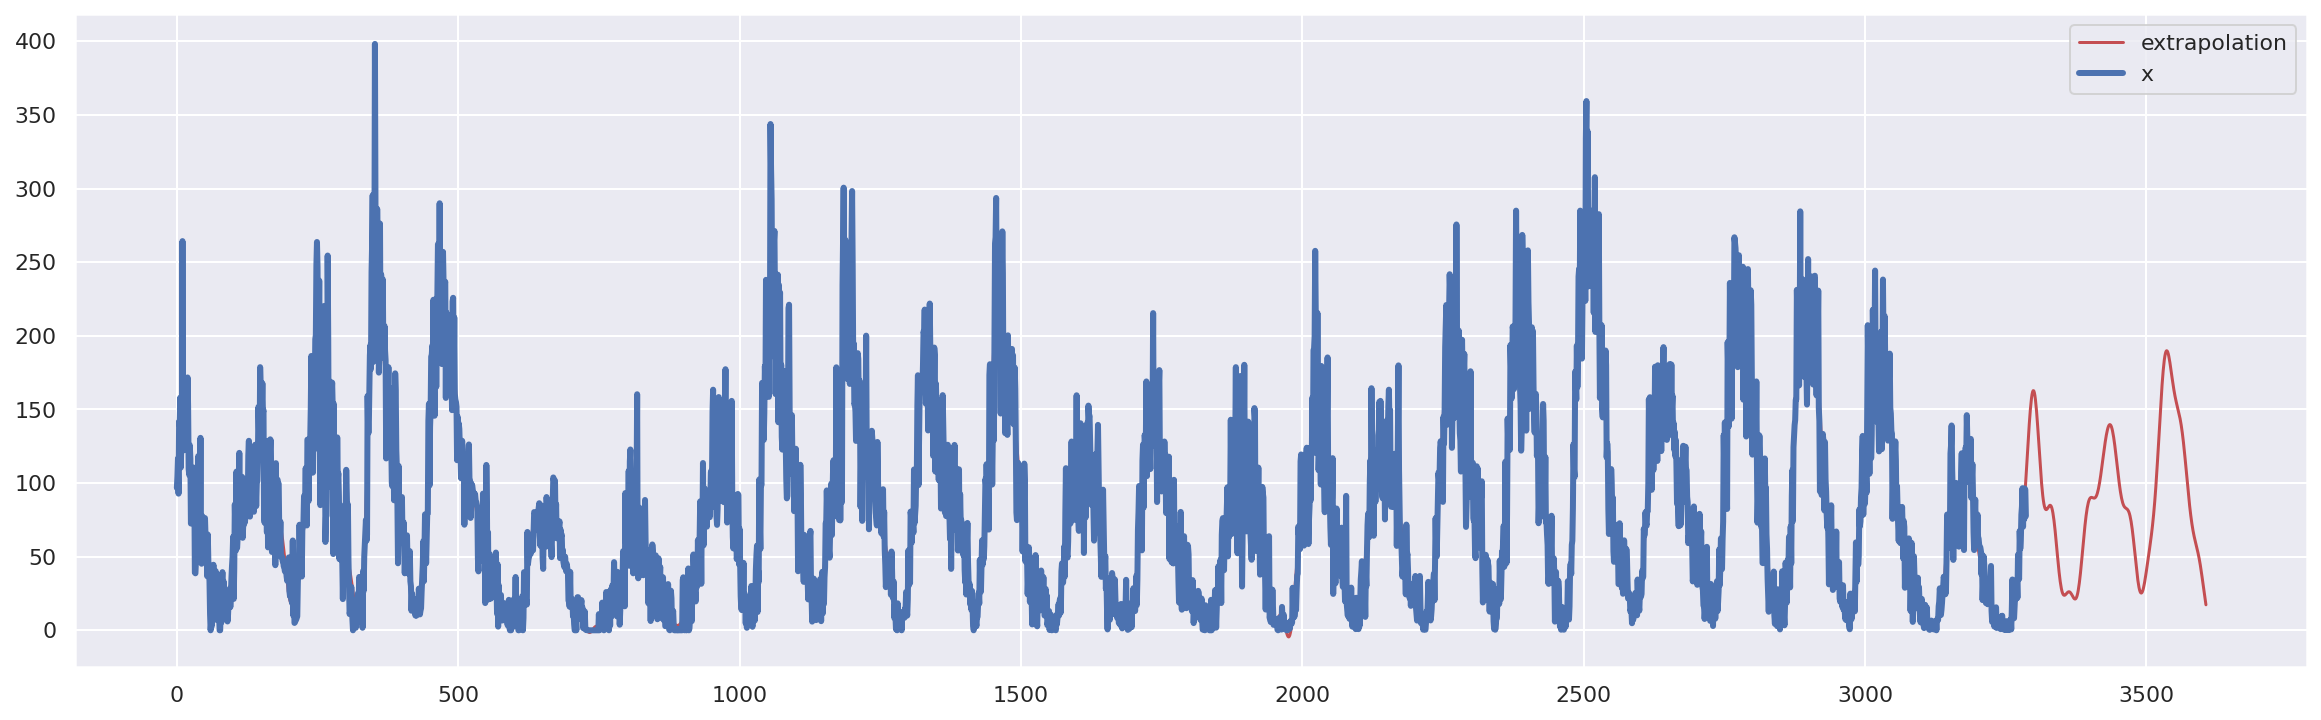

In [84]:
sunspots_predict(data, n_predict = 320)

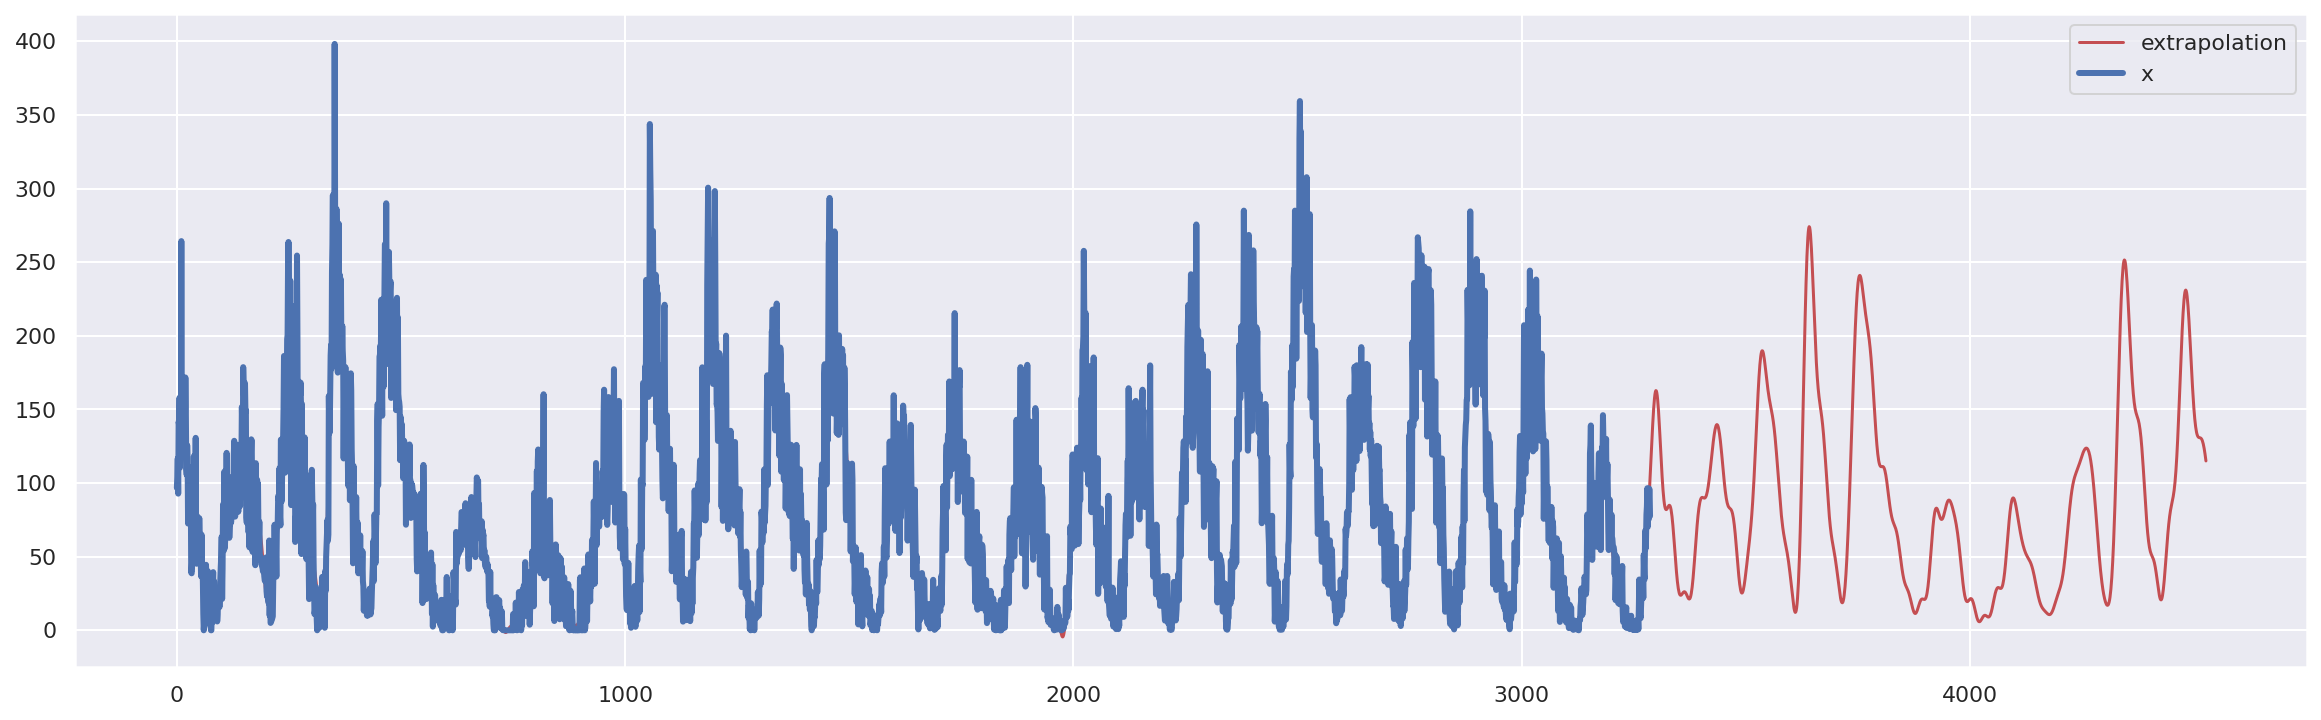

In [85]:
sunspots_predict(data, n_predict = 1240)

In [ ]:
#########################################
# Model
###########################################
model=Sequential()
dim_in = 4
dim_out = 3
nb_units = 10
model.add(LSTM(input_shape=(None, dim_in),
               return_sequences=True, 
               units=nb_units))
model.add(TimeDistributed(Dense(activation='linear', 
                                units=dim_out)))
model.compile(loss = 'mse', optimizer = 'rmsprop')

##
# Training
##
# 2 seconds for each epoch
np.random.seed(1337)
history = model.fit(inputs, outputs, 
                    epochs = 500, batch_size = 32,
                    validation_data=(inputs_test, 
                                     outputs_test))
plotting(history)
##########################

nb_units = 10

model = Sequential()
model.add(LSTM(batch_input_shape=(batch_size, None, dim_in),
               return_sequences=True, 
               units=nb_units, 
               stateful=True))
model.add(TimeDistributed(Dense(activation='linear',
                                units=dim_out)))
model.compile(loss = 'mse', optimizer = 'rmsprop')

# Training
##
epochs = 100

nb_reset = int(N / batch_size)
nb_cuts = int(T / T_after_cut)
if nb_reset > 1:
    ResetStatesCallback = define_reset_states_class(nb_cuts)
    ValidationCallback = define_stateful_val_loss_class(inputs_test, 
                                                        outputs_test, 
                                                        batch_size, nb_cuts)
    validation = ValidationCallback()
    history = model.fit(inputs, outputs, 
                        epochs = epochs, batch_size = batch_size, 
                        shuffle=False,
                        callbacks = [ResetStatesCallback(), validation])
    history.history['val_loss'] = ValidationCallback.get_val_loss(validation)
else:
    # When nb_reset = 1, we do not need to reinitialize state
    history = model.fit(inputs, outputs, 
                        epochs = epochs, batch_size = batch_size, 
                        shuffle=False,
                        validation_data=(inputs_test, 
                                         outputs_test))


## Mime model which is stateless but contains stateful weights
model_stateless = Sequential()
model_stateless.add(LSTM(input_shape=(None, dim_in),
                         return_sequences=True, units=nb_units))
model_stateless.add(TimeDistributed(Dense(activation='linear', 
                                          units=dim_out)))
model_stateless.compile(loss = 'mse', optimizer = 'rmsprop')
model_stateless.set_weights(model.get_weights())


In [ ]:
#####################################################################
# use the seasonal_decompose function to observe the same conclusion
#####################################################################

import pandas as pd
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/52)
plt.semilogy(results['period'], results['nspectrum'])


# improve the plot by convertint the data into grouped per week to avoid peaks
results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 13, 26, 39, 52])

# use the seasonal_decompose function to observe the same conclusion
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data.co2)
resplot = res.plot()


import statsmodels.datasets
data = statsmodels.datasets.co2.load_pandas().data
data.co2.interpolate(inplace=True)
data

import matplotlib.pyplot as plt

# convert into x and y
x = list(range(len(data.index)))
y = data.co2

# plot the co2 data
fig = plt.figure()
plt.plot(x,y)
plt.ylabel('CO2')
plt.xlabel('Week')

In [1]:
import pandas as pd

In [10]:
# 1-4     Year
# 5-6     Month
# 7-8     Day of month
# 9-12    Time in thousandths of day (.500 = 1200 UT)
# 13-20   Greenwich sunspot group # through 1976; NOAA/USAF grp # after 1976

# 21-22   00 1874-1981
# 23-24   Greenwich Group type

# 21      Suffix to group number 1982 to present
# 22-24   Magnetic group type (A=Alpha, B=Beta, D=Delta, G=Gamma) 1982 to present

# 25      Single space
# 26-29   Observed umbral area in millionths of solar disk 1874 through 1981

# 26-29   Zurich/McIntosh group type from 1982 to present (umbral area unavailable from NOAA)

# 30      Single space
# 31-34   Observed whole spot area in mill. of sol. disk
# 35      Single space
# 36-39   Corrected (for foreshortening) umbral area in millionths of solar
#         hemisphere, 1874 through 1981

# 36-39   Number of spots in group from 1982 to present (umbral area unavailable from NOAA)

# 40      Single space
# 41-44   Corrected whole spot area in millionths of solar hemisphere
# 45      Single space
# 46-50   Distance from center of solar disk in disk radii
# 51      Single space
# 52-56   Position angle from heliographic north (0=north, 90=east limb)
# 57      Single space
# 58-62   Carrington Longitude in degrees
# 63      Single space
# 64-68   Latitude, negative to the South
# 69      Single space
# 70-74   Central  meridian distance, negative to the East.
specs = [(0,4), (4,6), (6,12), (12,20), (20,24), (24, 31), (31, 36), (36, 40), (40,45), (45,50), (50,56)]
columns = ["yyyy","mm", "day_time", "ssp_group", "group_type", "RATE", "SN1", "NN", "sn", "spot_area", "snV2"]
dff = pd.read_fwf("g2022.txt", colspecs=specs, names=columns)
dff.head(55)


,yyyy,mm,day_time,ssp_group,group_type,RATE,SN1,NN,sn,spot_area,snV2
0,2022,1,1.0,12916,BG,Ehi,541,8,420,0.764,251.7
1,2022,1,1.0,12918,B,Bxo,13,2,20,0.940,294.8
2,2022,1,1.0,12919,A,Hrx,19,1,10,0.297,238.4
3,2022,1,1.0,12922,B,Cso,53,2,30,0.459,122.1
4,2022,1,2.0,12916,BG,Ehi,372,4,390,0.878,251.3
5,2022,1,2.0,12918,B,Bxo,2,2,10,0.992,292.7
6,2022,1,2.0,12922,B,Bxo,38,3,20,0.300,142.6
7,2022,1,2.0,12923,B,Bxo,16,3,20,0.907,238.3
8,2022,1,3.0,12916,B,Eho,179,3,320,0.960,252.2
9,2022,1,3.0,12922,B,Bxo,38,2,20,0.238,188.1


In [ ]:
specs = [(0,4), (4,6), (6,12), (12,22), (22,24), (24, 29), (29, 34), (34, 39), (39,44), (44,50)]
columns = ["yyyy","mm", "day_time", "ssp_group", "group_type", "snv2", "nn1", "sn", "nn2", "umbral_area"]
dff = pd.read_fwf("g2022.txt", colspecs=specs, names=columns)
dff.head(55)